In [1]:
# Import necessary libraries
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sys.path.append('../..')  # Add parent directory to path

from src.recommender import GameRecommender
from src.utils.utils import get_train_data, get_test_data


In [ ]:

# Load datasets
train_data = get_train_data()
test_data = get_test_data()

# Initialize the recommender with pre-trained model
recommender = GameRecommender("../../models/funk_svd/model/final/")

In [ ]:
# Test individual predictions
def test_user_predictions(user_id):
    # Get user's test ratings
    user_test_items = [item for item in test_data if item['UserId'] == user_id]

    # Get predictions
    predictions = recommender.get_predictions(user_id)

    # Compare and display results
    results = []
    for item in user_test_items:
        item_id = item['BggId']
        actual = item['Rating']
        predicted = predictions.get(item_id, None)
        if predicted is not None:
            results.append({
                'ItemId': item_id,
                'Actual': actual,
                'Predicted': predicted,
                'Error': actual - predicted
            })

    # Convert to DataFrame for easier analysis
    df_results = pd.DataFrame(results)
    return df_results

In [ ]:
# Get recommendations for a user
def get_recommendations(user_id, n=10):
    recommendations = recommender.get_top_n_recommendations(user_id, n)
    return pd.DataFrame(recommendations, columns=['ItemId', 'PredictedRating'])

In [ ]:
# Test with a specific user
user_id = 232941  # wonsigi529 from test data
prediction_results = test_user_predictions(user_id)
recommendations = get_recommendations(user_id)

# Display results
print("Prediction Results:")
print(prediction_results)

print("\nTop Recommendations:")
print(recommendations)

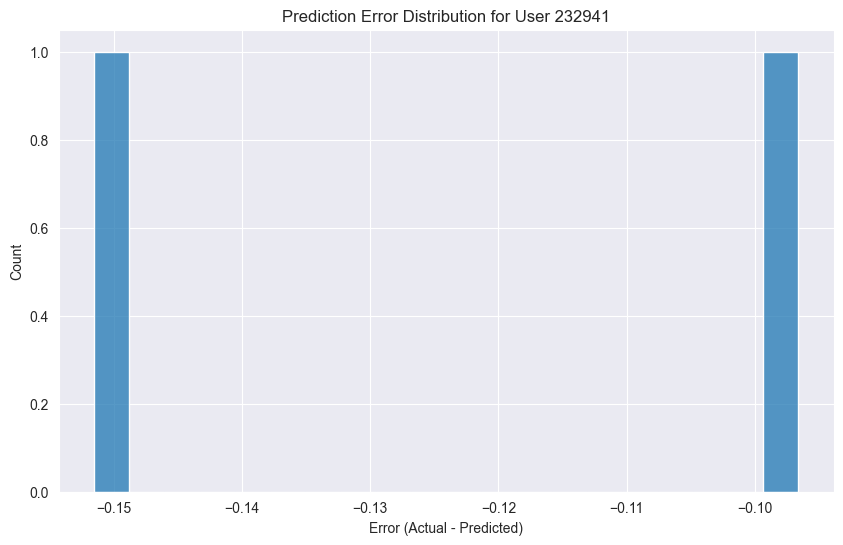

In [6]:
# Visualize error distribution
plt.figure(figsize=(10, 6))
sns.histplot(prediction_results['Error'], bins=20)
plt.title(f'Prediction Error Distribution for User {user_id}')
plt.xlabel('Error (Actual - Predicted)')
plt.show()

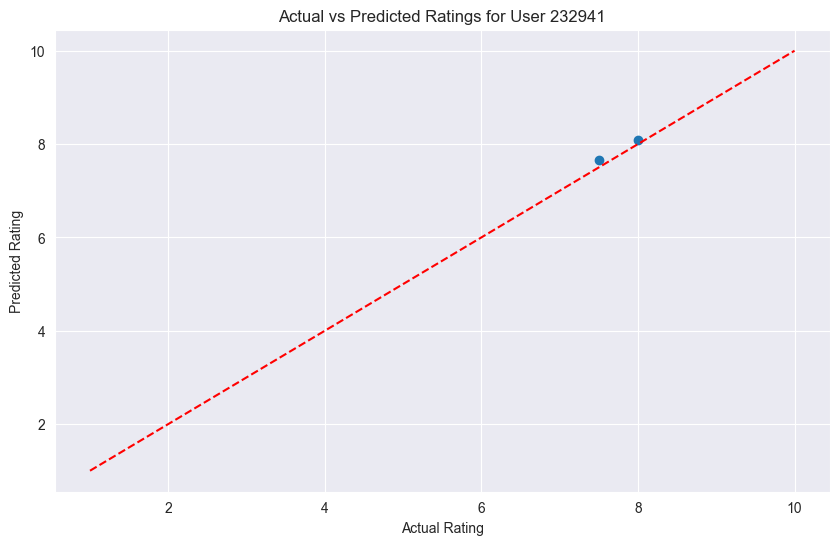

In [7]:
# Visualize actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(prediction_results['Actual'], prediction_results['Predicted'])
plt.plot([1, 10], [1, 10], 'r--')  # Perfect prediction line
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title(f'Actual vs Predicted Ratings for User {user_id}')
plt.show()